<a href="https://colab.research.google.com/github/danek121/machine-learning-course/blob/main/learning_machine/01_basics/02_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import bibliotek
import numpy as np
import pandas as pd
import sklearn


sklearn.__version__

'1.6.1'

In [3]:
#generowanie danych dataframe

data = {
      'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
      'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
      'gender': ['female', 'Male', np.nan, 'female', 'female', 'male'],
      'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
      'weight': [500, 450, 300, np.nan, 410, np.nan],
      'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no'],
}
df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,Male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [4]:
#kopia danych

df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 420.0+ bytes


In [5]:
#metoda isnull zwraca maske logiczne tam gdzie braki to true tam gdzie nie ma to false
df.isnull()

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [6]:
#sumowanie braków danych funkcja sum
df.isnull().sum()

,0
size,1
color,0
gender,1
price,1
weight,2
bought,0


In [7]:
#dodanie jeszcze jednego sum pokaze nam laczna ilosc brakow wszedzie
df.isnull().sum().sum()

np.int64(5)

In [8]:
#sprawdzenie procentowego braku danych dzielenie braków przez laczna ilosc danych (len(df))
df.isnull().sum() / len(df)

,0
size,0.166667
color,0.000000
gender,0.166667
price,0.166667
weight,0.333333
bought,0.000000


In [9]:
df[['weight']]

,weight
0,500.0
1,450.0
2,300.0
3,NaN
4,410.0
5,NaN


In [21]:
#klasa simpleimputer sluzaca do uzupelniana braków danych
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean') #mean uzupelnione srednia dane
imputer.fit(df[['weight']])


SimpleImputer()

In [22]:
#atrybut statistics wartosc obliczona która zostanie dodana zamiast NaN
imputer.statistics_

array([415.])

In [23]:
#dodajemy transformem dane do tabeli
df['weight'] = imputer.transform(df[['weight']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,Male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [24]:
#dodajemy price do tabeli
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=99.0)
imputer.fit_transform(df[['price']])

array([[199.],
       [ 89.],
       [ 99.],
       [129.],
       [ 79.],
       [ 89.]])

In [31]:
#dodajemy brakujace size
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value="L")
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['L'],
       ['M'],
       ['M']], dtype=object)

In [32]:
df = df_raw.copy()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,Male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [33]:
df.isnull().sum()

,0
size,1
color,0
gender,1
price,1
weight,2
bought,0


In [34]:
pd.isnull(df['weight'])

,weight
0,False
1,False
2,False
3,True
4,False
5,True


In [37]:
#tylko waga null
df[pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
3,NaN,green,female,129.0,NaN,no
5,M,green,male,89.0,NaN,no


In [38]:
#wszystkie wartosci gdzie jest null (~ przed pd)
df[~pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,Male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [43]:
#notnull zwraca tam gdzie jest prawda
df[pd.notnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,Male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [44]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,Male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [47]:
#metoda uzupelniana danych fillna
df.fillna(value='brak')

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,Male,89.0,450.0,no
2,M,blue,brak,brak,300.0,yes
3,brak,green,female,129.0,brak,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,brak,no


In [48]:
df['size']

,size
0,XL
1,L
2,M
3,NaN
4,M
5,M


In [49]:
#wstawianie danych do size za pomoca fillna
df['size'].fillna(value='L', inplace=True)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,Male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [57]:
#Pozbywanie sie brakow danych funkcja dropna (poozbywa sie wszystkich wierszy ktore maja brak danych)
df.dropna()

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,Male,89.0,450.0,no
4,M,red,female,79.0,410.0,yes


In [58]:
#pozbywanie się danych w wierszach o danej ilosci braku danych (w tym przypadku wiersze ktore mają więcej niż 2 braki)
df.dropna(thresh=df.shape[1] - 1)

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,Male,89.0,450.0,no
3,L,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [60]:
# braki danych w szeregach czasowych
#data_range zwraca daty
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)

df = pd.DataFrame(data=data, index=date_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


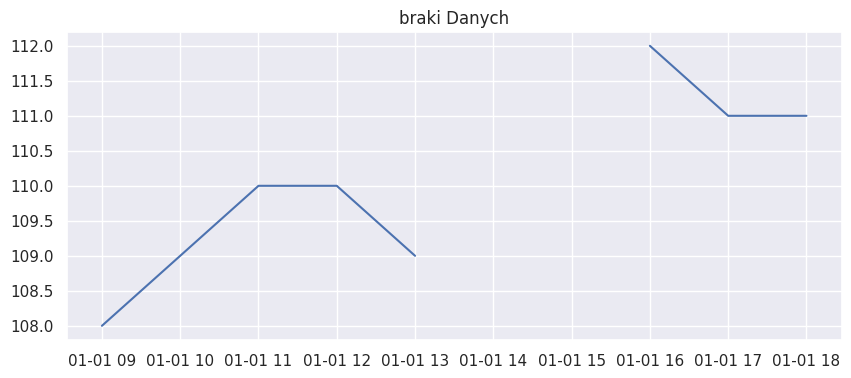

In [61]:
#importowanie bibliotek do wykresów(wyzualizacji danych)
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns

register_matplotlib_converters()
sns.set()


plt.figure(figsize=(10, 4))
plt.title('braki Danych')
_= plt.plot(df.price)


In [63]:
#biblioteka plotly do wizualizacji danych
import plotly.express as px
df_plotly = df.reset_index()
px.line(df_plotly, 'index', 'price', width=600, height=400, title='Szeregi Czasowe - Braki Danych')

In [65]:
#usuwanie braków danych funkcja dropna
df_plotly = df_plotly.dropna() # uzycie funkcji dropna
px.line(df_plotly, 'index', 'price', width=600, height=400, title='Szeregi Czasowe - Braki Danych') # wyswietlenie wykresu bez braków danych

In [69]:
#zmiana braków na stała wartość funkcja fillna
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(0)
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Szeregi Czasowe - Braki Danych - Wstawienie 0') # wyswietlenie wykresu bez braków danych

In [71]:
#uzycie fillna i wypelnienie braków za pomocą sredniej (funkcja mean())
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(df_plotly['price'].mean())
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Szeregi Czasowe - Braki Danych - Średnia') # wyswietlenie wykresu bez braków danych

In [72]:
#interpolacja danych
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].interpolate()
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Szeregi Czasowe - Braki Danych - Interpolacja') # wyswietlenie wykresu bez braków danych

In [74]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='ffill')
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Szeregi Czasowe - Braki Danych - Forward Fill') # wyswietlenie wykresu bez braków danych

/tmp/ipython-input-3278099195.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [75]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='bfill')
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Szeregi Czasowe - Braki Danych - Backward Fill') # wyswietlenie wykresu bez braków danych

/tmp/ipython-input-3245044709.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

